In [ ]:
##  drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip freeze

In [ ]:
## drive excel파일 read
import pandas as pd
df_origin = pd.read_excel("/content/drive/MyDrive/데이터마이닝 공유 폴더/excel/day1_1.xlsx")
#################################

In [ ]:
################

## df_origin -> df
df=df_origin

In [ ]:
df.columns

In [ ]:
df = df[df['view_growth'].notnull()] ## 조회수가 없는 관측치(결측치) 제거

In [ ]:
df = df[df['views'].notnull()] ## 조회수가 없는 관측치(결측치) 제거

In [ ]:
df=df.drop(["Trending_time","title","channel_title","publish_time","userCreated"], axis=1)

In [ ]:
df=df.drop(["likes","dislikes","comment_count"], axis=1)  ## (좋아요, 싫어요, 댓글수)/

In [ ]:
### 변수 일부만 선택
df=df[[ 'views','view_growth',
       'time_differ', 'question_mark', 'exclamation_mark',
       'category_id',
       'publish_hour', 'publish_day',
       'subscriberNum', 'daysfrom_created', 'daysfrom_publish', 
        't_yester_weather','y_finedust']]
        #,#,#'dailyviews', 'view_growth_ratio',,'first_view',   'publish_weather', 'publish_finedust',




## 모델 제외변수
#  
#        '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 
#        '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
#        '평균 전운량(1/10)', 'publish_date','t_1시간 최다일사량(MJ/m2)', 't_합계 일사량(MJ/m2)', 't_일 최심신적설(cm)',
#      't_일 최심적설(cm)', 't_평균 전운량(1/10)',
#  't_yester_pm2.5', 't_미세먼지', 't_초미세먼지', 't_평균기온(°C)', 't_강수 계속시간(hr)',
#        't_10분 최다 강수량(mm)', 't_1시간 최다강수량(mm)','t_yester_pm10', 
# 'publish_pm2.5','publish_pm10', 
# 'created_date', 'Trending_date', '평균기온(°C)','t_일강수량(mm)', '일강수량(mm)','created_year', 'created_month', 'video_order',



# ### 전체변수
# df=df[[ 'views','view_growth', #,#,#'dailyviews', 'view_growth_ratio',,'first_view',
#         'Trending_year', 'Trending_month', 
#        'Trending_date', 'time_differ', 
#         'video_order', 'question_mark', 'exclamation_mark',
#        'category_id', 'publish_year',
#        'publish_month', 'publish_date', 'publish_hour', 'publish_day',
#        'ratings_disabled', '평균기온(°C)',
#        '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)',
#        '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
#        '평균 전운량(1/10)', 'subscriberNum', 'created_year', 'created_month',
#        'created_date',  'daysfrom_created', 'daysfrom_publish',
#        'publish_pm10',  'publish_weather', 'publish_pm2.5',
#        'publish_finedust', 't_yester_pm10', 't_yester_weather',
#        't_yester_pm2.5', 't_미세먼지', 't_초미세먼지', 't_평균기온(°C)', 't_강수 계속시간(hr)',
#        't_10분 최다 강수량(mm)', 't_1시간 최다강수량(mm)', 't_일강수량(mm)',
#        't_1시간 최다일사량(MJ/m2)', 't_합계 일사량(MJ/m2)', 't_일 최심신적설(cm)',
#        't_일 최심적설(cm)', 't_평균 전운량(1/10)', 'y_finedust']]

In [ ]:
df.isnull().sum() ## 결측치 확인

time_differ            0
view_growth_ratio      1
video_order            0
평균기온(°C)               0
강수 계속시간(hr)            0
                      ..
t_yester_weather_흐림    0
y_finedust_나쁨          0
y_finedust_매우나쁨        0
y_finedust_보통          0
y_finedust_좋음          0
Length: 323, dtype: int64

In [ ]:
#########dummy varaibles로 변환


df= pd.get_dummies(df, columns=[#'view_growth_ratio','views','dailyviews',
    
        'question_mark', 'exclamation_mark',
       'category_id', 'publish_hour', 'publish_day',
        't_yester_weather', 'y_finedust'
       ]) ## category????       'publish_weather', 'publish_finedust',


## 모델 제외변수
#'publish_date','Trending_date', 'created_date', 'video_order', 'created_month','created_year', 


## 전체 변수로 모델 구축시


# df= pd.get_dummies(df, columns=[#'view_growth_ratio','views','dailyviews',
#        'Trending_year', 'Trending_month', 
#        'Trending_date', 
#         'video_order', 'question_mark', 'exclamation_mark',
#        'category_id', 'publish_year',
#        'publish_month', 'publish_date', 'publish_hour', 'publish_day',
#        'ratings_disabled','created_year', 'created_month',
#        'created_date', 'publish_weather', 
#        'publish_finedust',  't_yester_weather', 'y_finedust'
#        ]) ## category????


In [ ]:
## 더미 변수 확인
df.columns[0:100]

views                   142320.00000
view_growth             105441.00000
time_differ                  1.58125
subscriberNum           125000.00000
daysfrom_created          2798.41875
                            ...     
publish_finedust_좋음          1.00000
t_yester_weather_맑음          0.00000
t_yester_weather_비/눈         0.00000
t_yester_weather_흐림          1.00000
y_finedust_나쁨                0.00000
Name: 0, Length: 100, dtype: float64

In [ ]:
for i in range(103):
  print(df.iloc[0][i],",")

In [ ]:
### 더미변수 선택
df=df[[ 'views', 'view_growth', 'time_differ', 't_일강수량(mm)', '일강수량(mm)',
       'subscriberNum', 'daysfrom_created', 'daysfrom_publish', '평균기온(°C)',
       'Trending_year_2017', 'Trending_year_2018', 'Trending_year_2020',
        'Trending_month_1', 'Trending_month_2',
       'Trending_month_3', 'Trending_month_4', 'Trending_month_5',
       'Trending_month_6', 'Trending_month_8', 'Trending_month_9',
       'Trending_month_10', 'Trending_month_11', 
       'video_order_1', 'question_mark_0', 
       'exclamation_mark_0',  'category_id_1',
       'category_id_2', 'category_id_10', 'category_id_15', 'category_id_17',
       'category_id_19', 'category_id_20', 'category_id_22', 'category_id_23',
       'category_id_24', 'category_id_25', 'category_id_26', 'category_id_27',
       'category_id_28', 'category_id_29', 
       'publish_year_2017', 'publish_year_2018', 'publish_year_2020',
       'publish_month_1', 'publish_month_2',
       'publish_month_3', 'publish_month_4', 'publish_month_5',
       'publish_month_6', 'publish_month_8', 'publish_month_9',
       'publish_month_10', 'publish_month_11', 
       'publish_hour_0', 'publish_hour_1', 'publish_hour_2', 'publish_hour_3',
       'publish_hour_4', 'publish_hour_5', 'publish_hour_6', 'publish_hour_7',
       'publish_hour_8', 'publish_hour_9', 'publish_hour_10',
       'publish_hour_11', 'publish_hour_12', 'publish_hour_13',
       'publish_hour_14', 'publish_hour_15', 'publish_hour_16',
       'publish_hour_17', 'publish_hour_18', 'publish_hour_19',
       'publish_hour_20', 'publish_hour_21', 'publish_hour_22',
        'publish_day_1', 'publish_day_2', 'publish_day_3',
       'publish_day_4', 'publish_day_5', 'publish_day_6', 
       'ratings_disabled_0',  'created_year_2005',
       'created_year_2006', 'created_year_2007', 'created_year_2008',
       'created_year_2009', 'created_year_2010', 'created_year_2011',
       'created_year_2012', 'created_year_2013', 'created_year_2014',
       'created_year_2015', 'created_year_2016', 'created_year_2017',
       'created_year_2018', 'created_year_2019', 'created_year_2020',
        'created_month_1', 'created_month_2',
       'created_month_3', 'created_month_4', 'created_month_5',
       'created_month_6', 'created_month_7', 'created_month_8',
       'created_month_9', 'created_month_10', 'created_month_11',
        'publish_weather_맑음', 'publish_weather_비/눈',
        'publish_finedust_나쁨', 'publish_finedust_매우나쁨',
       'publish_finedust_보통',  't_yester_weather_맑음',
       't_yester_weather_비/눈',  'y_finedust_나쁨',
       'y_finedust_매우나쁨', 'y_finedust_보통',]]

       # 'y_finedust_좋음','t_yester_weather_흐림','publish_finedust_좋음', 'publish_weather_흐림','created_month_12',
#        'created_year_2021','ratings_disabled_1','publish_day_7','publish_hour_23','publish_month_12', 'publish_year_2021',
# 'category_id_43','exclamation_mark_1','question_mark_1','Trending_month_12','Trending_year_2021',

In [ ]:
### train, test set 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["view_growth"],axis=1), df["view_growth"],test_size=0.3, random_state=12)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
model = RandomForestRegressor(n_estimators=1000, max_features=50, max_depth=15, min_samples_split=10)


##########모델 학습
with tf.device('/device:GPU:0'):
  model.fit(x_train, y_train)



##########모델 검증
print("train model :",model.score(x_train, y_train)) 
print("test model :",model.score(x_test, y_test)) 



# # model predict
# y_pred = xgb.predict(x_test)

# # Score
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

# y_true = y_test 
# print("r2_score: ",r2_score(x_test, y_test))

train model : 0.8155565261786393
test model : 0.6292712533220376


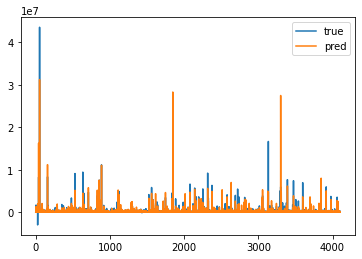

In [ ]:
###
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(y_test),label = "true")
plt.plot(np.array(model.predict(x_test)),label = "pred")

plt.legend(fontsize=10)
plt.show()

In [ ]:
import numpy as np
a=np.array([142320.0 ,
105441.0 ,
1.5812500000029104 ,
125000.0 ,
2798.41875 ,
1.58125000000291 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
#1.0
 ])

In [ ]:
from sklearn import datasets
import pickle
from sklearn.externals import joblib

joblib.dump(model, 'randomforest.pkl') 

import joblib
joblib.dump(model, "random_forest.joblib")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

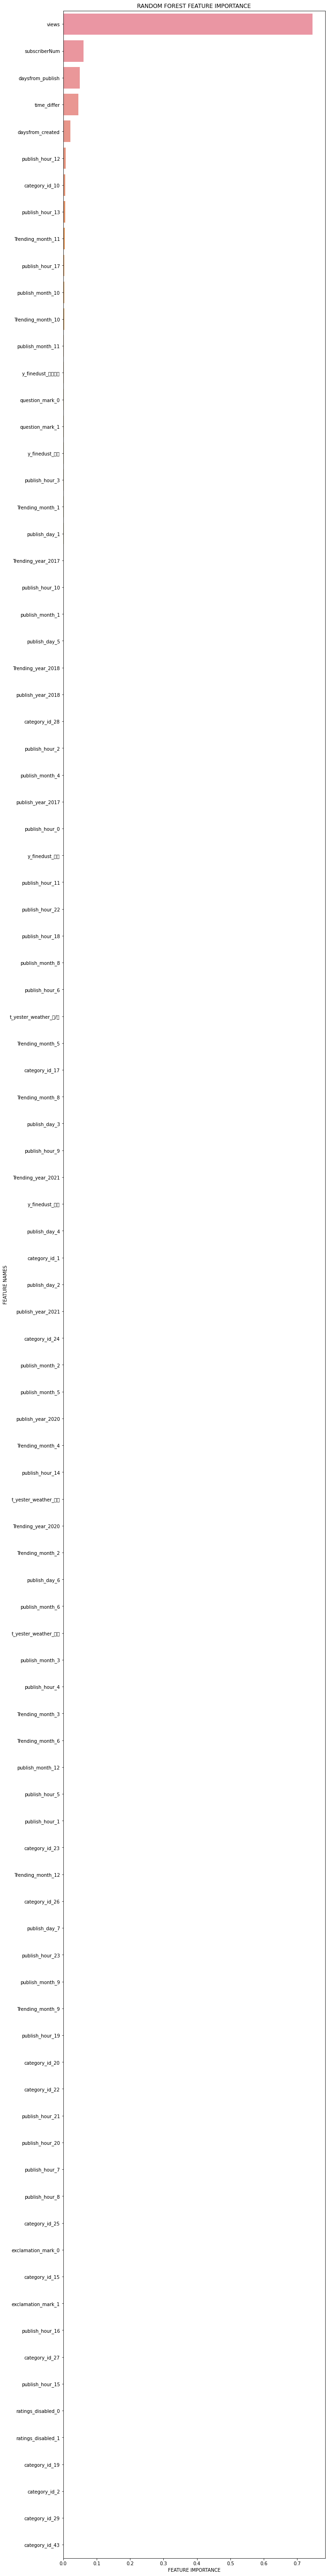

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,100))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.feature_importances_,x_train.columns,'RANDOM FOREST')

In [ ]:
# XGboost모델 생성
from xgboost import XGBRegressor

xgb = XGBRegressor( n_estimators=1000, learning_rate=0.01, max_depth=10, objective='reg:squarederror') 
## parameter tuning : n_estimator : 100, learning_rate : 0.1 max_depth : 7, ,reg_alpha=5
## tree_method = "gpu_hist"

# 모델 훈련
xgb.fit(x_train, y_train) 

# 모델 예측
y_pred = xgb.predict(x_test)

In [ ]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features=20)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["daysfrom_created"], df["views"])

In [ ]:
## Score 출력
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

y_true = y_test 

mae = mean_absolute_error(y_true, y_pred)  ## MAE 출력
print(mae)

mse = mean_squared_error(y_true, y_pred)  ## MSE 출력
print(mse)

print("r2_score: ",r2_score(y_true, y_pred))

In [ ]:
filename = 'xgb_model.model'

# filename으로 모델 저장
xgb.save_model(filename)

In [ ]:
## linear regression 으로 예측 모델 구축
## random forest 예측 모델 이용 후 feature importance 측정
## 측정한 feature importance 토대로 구축한 xgboost와 기존 xgboost 모델과 비교